In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_biopsy():
    # import data
    biopsy = pd.read_csv('biopsy.csv', na_values='?', 
                         dtype={'ID': str}).dropna().reset_index()
    
    # Split in training and test data
    trainI = np.random.choice(biopsy.shape[0], size=300, replace=False)    
    trainIndex=biopsy.index.isin(trainI)    
    train=biopsy.iloc[trainIndex] # training set
    test=biopsy.iloc[~trainIndex] # test set    
    
    # Extract relevant data features
    X_train = train[['V1','V2','V3','V4','V5','V6','V7','V8','V9']].values
    X_test = test[['V1','V2','V3','V4','V5','V6','V7','V8','V9']].values    
    Y_train=(train['class']=='malignant').astype(int).values.reshape((-1,1))
    Y_test=(test['class']=='malignant').astype(int).values.reshape((-1,1))
    
    return X_train, Y_train, X_test, Y_test

In [3]:
def initialize(x_train,y_train):
   # w = np.random.random([x_train.shape[1]])
    w=np.array([0.39401661, 0.47478989, 0.06309985, 0.99740423, 0.33530285,
                0.60437357, 0.74371789, 0.3407668 , 0.81388953])
    n = x_train.shape[0]
    x = np.transpose(x_train)
    b = 0
    alpha = -0.8
    min_cost = 0.062
    return w,x,n,b,alpha,min_cost

In [61]:
# Sigma(z) using activation functio = sigmoid
def sigma(z_i,activation=False):
    if(activation==False):
        return print('Please choose an activation function')
    elif(activation=='sigmoid'):
        sig = 1/(1+np.exp(-z_i))
        return sig

In [62]:
# Function to calculate the loss (Cross Entropy) and cost function
def cost_function(y_i,p_i,loss_function=False): 
    if(loss_function==False):
        return print('Please choose a loss function')
    elif(loss_function=='cross_entropy'):
        n = y_i.shape[0]
        loss_calc = -(y_i*np.log(p_i) + (1-y_i)*(np.log(1-p_i)))
        cost_calc = (1/n)*np.sum(loss_calc)
        return loss_calc,cost_calc

In [63]:
def grad(p_in,y_in,x_in):
    n_in = y_in.shape[0]
    dLdb = p_in - y_in
    dJdb = (1/n_in)*np.sum(dLdb)  
    dJdw = (1/n)*np.dot(dLdb,x_in) # vector dJ/dW_j to update w_j
    return dJdw,dJdb

In [87]:
X_train, Y_train, X_test, Y_test=load_biopsy()
Y_train.shape

(300, 1)

In [88]:
X_train, Y_train, X_test, Y_test=load_biopsy()
X_train = X_train/np.max(X_train)
Y_train = np.reshape(Y_train,(Y_train.shape[0],))
Y_train.shape

(300,)

In [86]:
X_test = X_test/np.max(X_test)
Y_test = np.reshape(Y_test,(Y_test.shape[0],))
Y_test.shape

(383,)

In [67]:
w,x,n,b,alpha,min_cost=initialize(X_train,Y_train) # Initialize variables

In [68]:
z = np.dot(w,x)+b
p_i=sigma(z,activation='sigmoid')
w

array([0.39401661, 0.47478989, 0.06309985, 0.99740423, 0.33530285,
       0.60437357, 0.74371789, 0.3407668 , 0.81388953])

In [69]:
l,j= cost_function(Y_train,p_i,loss_function='cross_entropy') # l = loss function
print('Cost Function =',j,'\nLoss Function vector =',l)

Cost Function = 0.7902783894603486 
Loss Function vector = [1.169894   1.8272212  1.29627854 1.2236026  1.13708983 1.05307539
 0.03541129 0.17643728 1.10508672 1.21008508 0.07670548 1.07890688
 1.07598413 0.16640964 1.05307539 0.98838425 1.08307614 1.43836494
 0.06899869 0.12328654 0.15817875 0.0665284  1.08061423 1.29627854
 0.10756239 0.12962418 0.03711084 0.06831901 0.20172352 1.06682266
 0.21971658 1.15543526 1.14017766 1.46166296 0.04716031 0.17064305
 1.03979321 1.21195952 1.07503545 1.2157608  1.38413928 0.03153142
 0.14417196 0.06051715 1.141842   1.07598413 1.15543526 1.02759654
 1.07598413 0.12317917 0.21742786 1.15976239 0.02118711 1.4728502
 1.13824056 0.0296174  1.20287532 1.14712437 1.23060575 0.04552055
 0.11532367 1.14017766 1.10212501 0.03752081 1.10152842 1.27350266
 1.10508672 1.005282   0.11522385 1.13824056 1.05307539 1.13642694
 0.11465623 1.06246697 1.10212501 0.03623686 1.17890523 1.12861027
 1.45229929 1.22113707 0.04126435 1.12861027 1.02236333 1.07598413
 1.0

In [70]:
dw,db= grad(p_i,Y_train,X_train)
dw

array([0.11891725, 0.04498794, 0.05079609, 0.05046761, 0.08179845,
       0.04437387, 0.0819181 , 0.04255338, 0.04544635])

In [71]:
w += alpha*dw
b += alpha*db

In [72]:
print('w =',w,'\n b =',b)

w = [0.29888281 0.43879954 0.02246298 0.95703014 0.26986409 0.56887447
 0.67818341 0.30672409 0.77753245] 
 b = -0.34057655574098283


In [73]:
counter = 0
cost = [];iter = [];
cost_test = [];
while(j>min_cost):
#for j in range(100):
    z = np.dot(w,x)+b
    counter+=1
    p_i=sigma(z,activation='sigmoid')
    l,j= cost_function(Y_train,p_i,loss_function='cross_entropy')
    cost.append(j)
    iter.append(counter)
    
    z_test = np.dot(w,np.transpose(X_test))+b
    p_i_test=sigma(z_test,activation='sigmoid')
    l_test,j_test= cost_function(Y_test,p_i_test,loss_function='cross_entropy')
    cost_test.append(j_test)
    
    print('Cost Function =',j,'\n')
    dw,db = grad(p_i,Y_train,X_train)
    w +=alpha*dw
    b +=alpha*db
print('Number of iterations = ',counter)

Cost Function = 0.6309369979730232 

Cost Function = 0.5330466291082309 

Cost Function = 0.47566953545618545 

Cost Function = 0.4408669436694632 

Cost Function = 0.4174667146220668 

Cost Function = 0.3997145878020002 

Cost Function = 0.3849260483830263 

Cost Function = 0.37188905839317477 

Cost Function = 0.36004529600786606 

Cost Function = 0.34911896919477475 

Cost Function = 0.33895722291636504 

Cost Function = 0.32946269932653005 

Cost Function = 0.3205649160328754 

Cost Function = 0.31220784992167433 

Cost Function = 0.30434432254920485 

Cost Function = 0.29693328647901457 

Cost Function = 0.28993838310422815 

Cost Function = 0.28332708162247583 

Cost Function = 0.27707010060042003 

Cost Function = 0.27114097921968544 

Cost Function = 0.2655157365840167 

Cost Function = 0.2601725888367788 

Cost Function = 0.255091708045838 

Cost Function = 0.2502550135020257 

Cost Function = 0.24564598939712767 

Cost Function = 0.24124952461406485 

Cost Function = 0.237051

Cost Function = 0.0823481323919959 

Cost Function = 0.08230115116155068 

Cost Function = 0.08225440871054611 

Cost Function = 0.0822079031386641 

Cost Function = 0.08216163256552132 

Cost Function = 0.082115595130411 

Cost Function = 0.0820697889920488 

Cost Function = 0.0820242123283224 

Cost Function = 0.08197886333604491 

Cost Function = 0.08193374023071244 

Cost Function = 0.08188884124626483 

Cost Function = 0.08184416463485056 

Cost Function = 0.08179970866659464 

Cost Function = 0.08175547162937064 

Cost Function = 0.08171145182857568 

Cost Function = 0.08166764758690914 

Cost Function = 0.08162405724415434 

Cost Function = 0.08158067915696399 

Cost Function = 0.08153751169864838 

Cost Function = 0.08149455325896698 

Cost Function = 0.08145180224392325 

Cost Function = 0.08140925707556197 

Cost Function = 0.08136691619177033 

Cost Function = 0.08132477804608147 

Cost Function = 0.08128284110748087 

Cost Function = 0.0812411038602159 

Cost Function = 0.0

Cost Function = 0.07489538490057669 

Cost Function = 0.07487760461110705 

Cost Function = 0.07485987336553385 

Cost Function = 0.0748421909345013 

Cost Function = 0.07482455709011387 

Cost Function = 0.07480697160592496 

Cost Function = 0.07478943425692514 

Cost Function = 0.07477194481953126 

Cost Function = 0.07475450307157495 

Cost Function = 0.07473710879229169 

Cost Function = 0.07471976176230975 

Cost Function = 0.07470246176363932 

Cost Function = 0.07468520857966174 

Cost Function = 0.07466800199511878 

Cost Function = 0.07465084179610211 

Cost Function = 0.07463372777004282 

Cost Function = 0.07461665970570085 

Cost Function = 0.07459963739315498 

Cost Function = 0.07458266062379239 

Cost Function = 0.07456572919029875 

Cost Function = 0.07454884288664793 

Cost Function = 0.0745320015080924 

Cost Function = 0.0745152048511532 

Cost Function = 0.07449845271361022 

Cost Function = 0.07448174489449257 

Cost Function = 0.07446508119406899 

Cost Function =

Cost Function = 0.07076965967565008 

Cost Function = 0.07076087597653562 

Cost Function = 0.07075210673962483 

Cost Function = 0.07074335192338825 

Cost Function = 0.07073461148646804 

Cost Function = 0.07072588538767718 

Cost Function = 0.07071717358599847 

Cost Function = 0.07070847604058368 

Cost Function = 0.07069979271075268 

Cost Function = 0.07069112355599252 

Cost Function = 0.07068246853595662 

Cost Function = 0.07067382761046384 

Cost Function = 0.07066520073949756 

Cost Function = 0.070656587883205 

Cost Function = 0.0706479890018962 

Cost Function = 0.07063940405604326 

Cost Function = 0.0706308330062794 

Cost Function = 0.07062227581339828 

Cost Function = 0.07061373243835306 

Cost Function = 0.07060520284225545 

Cost Function = 0.07059668698637528 

Cost Function = 0.07058818483213923 

Cost Function = 0.07057969634113027 

Cost Function = 0.07057122147508682 

Cost Function = 0.07056276019590192 

Cost Function = 0.07055431246562244 

Cost Function = 

Cost Function = 0.06887773559851866 

Cost Function = 0.06887168400486068 

Cost Function = 0.06886564000574154 

Cost Function = 0.06885960358492522 

Cost Function = 0.0688535747262268 

Cost Function = 0.06884755341351205 

Cost Function = 0.06884153963069746 

Cost Function = 0.06883553336174987 

Cost Function = 0.06882953459068639 

Cost Function = 0.068823543301574 

Cost Function = 0.0688175594785297 

Cost Function = 0.06881158310571979 

Cost Function = 0.06880561416736013 

Cost Function = 0.06879965264771577 

Cost Function = 0.06879369853110064 

Cost Function = 0.06878775180187754 

Cost Function = 0.0687818124444578 

Cost Function = 0.06877588044330113 

Cost Function = 0.06876995578291548 

Cost Function = 0.06876403844785675 

Cost Function = 0.0687581284227286 

Cost Function = 0.06875222569218238 

Cost Function = 0.06874633024091675 

Cost Function = 0.06874044205367773 

Cost Function = 0.06873456111525816 

Cost Function = 0.06872868741049797 

Cost Function = 0.


Cost Function = 0.06690431393364348 

Cost Function = 0.06690041284858762 

Cost Function = 0.06689651542327234 

Cost Function = 0.06689262165214029 

Cost Function = 0.06688873152964656 

Cost Function = 0.06688484505025843 

Cost Function = 0.0668809622084554 

Cost Function = 0.06687708299872915 

Cost Function = 0.06687320741558353 

Cost Function = 0.06686933545353443 

Cost Function = 0.06686546710710989 

Cost Function = 0.06686160237084994 

Cost Function = 0.06685774123930661 

Cost Function = 0.06685388370704393 

Cost Function = 0.06685002976863783 

Cost Function = 0.0668461794186761 

Cost Function = 0.06684233265175846 

Cost Function = 0.06683848946249643 

Cost Function = 0.06683464984551327 

Cost Function = 0.0668308137954441 

Cost Function = 0.06682698130693565 

Cost Function = 0.0668231523746464 

Cost Function = 0.06681932699324648 

Cost Function = 0.06681550515741765 

Cost Function = 0.06681168686185317 

Cost Function = 0.06680787210125796 

Cost Function =

Cost Function = 0.06589795209167529 

Cost Function = 0.06589492755981433 

Cost Function = 0.06589190546637493 

Cost Function = 0.06588888580826562 

Cost Function = 0.06588586858240066 

Cost Function = 0.06588285378569973 

Cost Function = 0.06587984141508829 

Cost Function = 0.0658768314674972 

Cost Function = 0.06587382393986299 

Cost Function = 0.06587081882912764 

Cost Function = 0.06586781613223873 

Cost Function = 0.06586481584614932 

Cost Function = 0.06586181796781794 

Cost Function = 0.06585882249420869 

Cost Function = 0.06585582942229112 

Cost Function = 0.06585283874904015 

Cost Function = 0.06584985047143634 

Cost Function = 0.06584686458646541 

Cost Function = 0.06584388109111877 

Cost Function = 0.06584089998239309 

Cost Function = 0.0658379212572905 

Cost Function = 0.06583494491281845 

Cost Function = 0.06583197094598987 

Cost Function = 0.06582899935382291 

Cost Function = 0.06582603013334112 

Cost Function = 0.06582306328157349 

Cost Function 

Cost Function = 0.06514127506693976 

Cost Function = 0.06513882642631323 

Cost Function = 0.06513637954100182 

Cost Function = 0.06513393440906799 

Cost Function = 0.06513149102857724 

Cost Function = 0.06512904939759798 

Cost Function = 0.0651266095142017 

Cost Function = 0.06512417137646287 

Cost Function = 0.065121734982459 

Cost Function = 0.06511930033027052 

Cost Function = 0.06511686741798084 

Cost Function = 0.06511443624367644 

Cost Function = 0.06511200680544664 

Cost Function = 0.06510957910138383 

Cost Function = 0.06510715312958329 

Cost Function = 0.06510472888814328 

Cost Function = 0.06510230637516505 

Cost Function = 0.06509988558875267 

Cost Function = 0.06509746652701327 

Cost Function = 0.06509504918805681 

Cost Function = 0.06509263356999623 

Cost Function = 0.06509021967094736 

Cost Function = 0.06508780748902894 

Cost Function = 0.06508539702236266 

Cost Function = 0.06508298826907301 

Cost Function = 0.06508058122728749 

Cost Function =

Cost Function = 0.06429914969582795 

Cost Function = 0.06429726571967317 

Cost Function = 0.06429538292134217 

Cost Function = 0.06429350129972734 

Cost Function = 0.06429162085372257 

Cost Function = 0.06428974158222316 

Cost Function = 0.06428786348412581 

Cost Function = 0.06428598655832876 

Cost Function = 0.06428411080373161 

Cost Function = 0.06428223621923547 

Cost Function = 0.0642803628037428 

Cost Function = 0.06427849055615757 

Cost Function = 0.06427661947538513 

Cost Function = 0.06427474956033224 

Cost Function = 0.06427288080990719 

Cost Function = 0.06427101322301959 

Cost Function = 0.06426914679858049 

Cost Function = 0.06426728153550239 

Cost Function = 0.06426541743269917 

Cost Function = 0.06426355448908615 

Cost Function = 0.06426169270358004 

Cost Function = 0.064259832075099 

Cost Function = 0.06425797260256252 

Cost Function = 0.06425611428489159 

Cost Function = 0.06425425712100848 

Cost Function = 0.06425240110983697 

Cost Function =

Cost Function = 0.06349140463300083 

Cost Function = 0.06348999232576183 

Cost Function = 0.06348858078597053 

Cost Function = 0.06348717001301427 

Cost Function = 0.06348576000628105 

Cost Function = 0.06348435076515961 

Cost Function = 0.0634829422890392 

Cost Function = 0.06348153457730994 

Cost Function = 0.0634801276293624 

Cost Function = 0.063478721444588 

Cost Function = 0.06347731602237872 

Cost Function = 0.06347591136212725 

Cost Function = 0.06347450746322691 

Cost Function = 0.06347310432507172 

Cost Function = 0.06347170194705629 

Cost Function = 0.06347030032857605 

Cost Function = 0.06346889946902685 

Cost Function = 0.06346749936780544 

Cost Function = 0.06346610002430905 

Cost Function = 0.06346470143793566 

Cost Function = 0.06346330360808387 

Cost Function = 0.06346190653415297 

Cost Function = 0.06346051021554282 

Cost Function = 0.06345911465165407 

Cost Function = 0.06345771984188789 

Cost Function = 0.06345632578564617 

Cost Function = 

Cost Function = 0.06282649617593335 

Cost Function = 0.06282542382340005 

Cost Function = 0.06282435198498272 

Cost Function = 0.06282328066032608 

Cost Function = 0.06282220984907512 

Cost Function = 0.06282113955087526 

Cost Function = 0.06282006976537216 

Cost Function = 0.06281900049221181 

Cost Function = 0.06281793173104061 

Cost Function = 0.06281686348150517 

Cost Function = 0.06281579574325252 

Cost Function = 0.06281472851593004 

Cost Function = 0.06281366179918535 

Cost Function = 0.06281259559266641 

Cost Function = 0.0628115298960216 

Cost Function = 0.06281046470889948 

Cost Function = 0.06280940003094908 

Cost Function = 0.06280833586181965 

Cost Function = 0.06280727220116085 

Cost Function = 0.06280620904862258 

Cost Function = 0.06280514640385514 

Cost Function = 0.06280408426650909 

Cost Function = 0.06280302263623533 

Cost Function = 0.06280196151268515 

Cost Function = 0.0628009008955101 

Cost Function = 0.062799840784362 

Cost Function = 

Cost Function = 0.06242623578856158 

Cost Function = 0.06242534779179523 

Cost Function = 0.06242446018725561 

Cost Function = 0.0624235729746953 

Cost Function = 0.06242268615386706 

Cost Function = 0.06242179972452392 

Cost Function = 0.062420913686419076 

Cost Function = 0.06242002803930598 

Cost Function = 0.06241914278293819 

Cost Function = 0.062418257917069585 

Cost Function = 0.062417373441454205 

Cost Function = 0.06241648935584626 

Cost Function = 0.062415605660000185 

Cost Function = 0.06241472235367069 

Cost Function = 0.062413839436612564 

Cost Function = 0.0624129569085809 

Cost Function = 0.062412074769330965 

Cost Function = 0.062411193018618236 

Cost Function = 0.062410311656198356 

Cost Function = 0.06240943068182722 

Cost Function = 0.06240855009526092 

Cost Function = 0.0624076698962557 

Cost Function = 0.06240679008456809 

Cost Function = 0.062405910659954766 

Cost Function = 0.062405031622172605 

Cost Function = 0.06240415297097874 

Cost 

Cost Function = 0.062237489990003746 

Cost Function = 0.06223668369219617 

Cost Function = 0.06223587773619082 

Cost Function = 0.062235072121781476 

Cost Function = 0.06223426684876207 

Cost Function = 0.06223346191692664 

Cost Function = 0.062232657326069474 

Cost Function = 0.06223185307598498 

Cost Function = 0.06223104916646769 

Cost Function = 0.06223024559731238 

Cost Function = 0.06222944236831394 

Cost Function = 0.062228639479267406 

Cost Function = 0.06222783692996802 

Cost Function = 0.062227034720211134 

Cost Function = 0.06222623284979238 

Cost Function = 0.0622254313185074 

Cost Function = 0.06222463012615206 

Cost Function = 0.06222382927252242 

Cost Function = 0.06222302875741468 

Cost Function = 0.062222228580625163 

Cost Function = 0.06222142874195043 

Cost Function = 0.062220629241187146 

Cost Function = 0.06221983007813214 

Cost Function = 0.06221903125258239 

Cost Function = 0.062218232764335114 

Cost Function = 0.06221743461318761 

Cost 

Cost Function = 0.06206799235848957 

Cost Function = 0.06206725656062857 

Cost Function = 0.0620665210628711 

Cost Function = 0.062065785865043306 

Cost Function = 0.06206505096697149 

Cost Function = 0.06206431636848197 

Cost Function = 0.06206358206940133 

Cost Function = 0.062062848069556274 

Cost Function = 0.06206211436877348 

Cost Function = 0.06206138096687998 

Cost Function = 0.062060647863702786 

Cost Function = 0.06205991505906909 

Cost Function = 0.06205918255280618 

Cost Function = 0.06205845034474154 

Cost Function = 0.06205771843470273 

Cost Function = 0.062056986822517445 

Cost Function = 0.06205625550801357 

Cost Function = 0.06205552449101904 

Cost Function = 0.06205479377136196 

Cost Function = 0.06205406334887054 

Cost Function = 0.062053333223373176 

Cost Function = 0.062052603394698334 

Cost Function = 0.06205187386267461 

Cost Function = 0.062051144627130794 

Cost Function = 0.06205041568789575 

Cost Function = 0.06204968704479846 

Cost F

In [84]:
prediction_train = np.where(p_i>0.5,1,0)

In [85]:
np.mean(prediction_train == Y_train)

0.97

In [76]:
print(pd.crosstab(prediction_train, Y_train)) 

col_0    0   1
row_0         
0      195   4
1        5  96


In [77]:
z_test = np.dot(w,np.transpose(X_test))+b
p_i_test=sigma(z_test,activation='sigmoid')
prediction_test = np.where(p_i_test>0.5,1,0)

In [78]:
np.mean(prediction_test == Y_test)

0.9660574412532638

In [79]:
print(pd.crosstab(prediction_test, Y_test))

col_0    0    1
row_0          
0      239    8
1        5  131


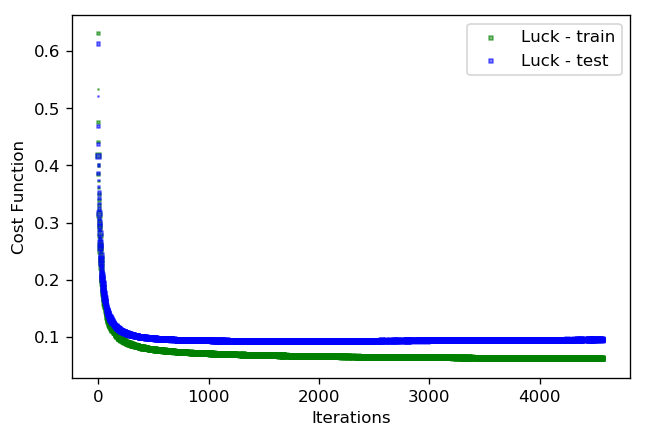

In [83]:
plt.figure(dpi = 120)
s = np.random.rand(*x.shape)*10
plt.scatter(iter,cost,s,c="g", marker="s", alpha=0.5,label="Luck - train")
plt.scatter(iter,cost_test,s,c="b", marker="s", alpha=0.5,label="Luck - test")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.legend(loc='upper right')
plt.show()